In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

In [3]:
train_images = mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [4]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


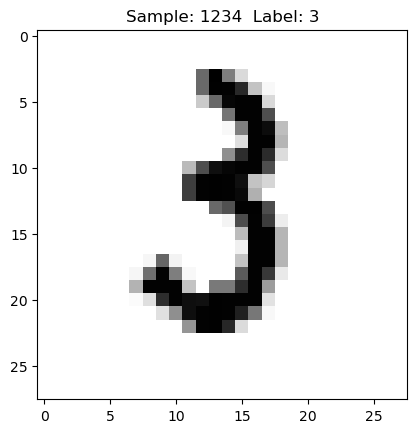

In [5]:
import matplotlib.pyplot as plt

def display_sample(num):
    print(train_labels[num])  
    label = train_labels[num].argmax(axis=0)
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1234)

In [13]:
from tensorflow.keras.layers import Input
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [16]:
history = model.fit(train_images, train_labels,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Epoch 1/10
600/600 - 2s - 3ms/step - accuracy: 0.9094 - loss: 0.3072 - val_accuracy: 0.9606 - val_loss: 0.1327
Epoch 2/10
600/600 - 1s - 2ms/step - accuracy: 0.9558 - loss: 0.1460 - val_accuracy: 0.9695 - val_loss: 0.0974
Epoch 3/10
600/600 - 1s - 2ms/step - accuracy: 0.9664 - loss: 0.1091 - val_accuracy: 0.9744 - val_loss: 0.0804
Epoch 4/10
600/600 - 1s - 2ms/step - accuracy: 0.9729 - loss: 0.0883 - val_accuracy: 0.9769 - val_loss: 0.0772
Epoch 5/10
600/600 - 1s - 2ms/step - accuracy: 0.9756 - loss: 0.0794 - val_accuracy: 0.9785 - val_loss: 0.0688
Epoch 6/10
600/600 - 1s - 2ms/step - accuracy: 0.9770 - loss: 0.0706 - val_accuracy: 0.9787 - val_loss: 0.0675
Epoch 7/10
600/600 - 1s - 2ms/step - accuracy: 0.9801 - loss: 0.0638 - val_accuracy: 0.9820 - val_loss: 0.0583
Epoch 8/10
600/600 - 1s - 2ms/step - accuracy: 0.9807 - loss: 0.0597 - val_accuracy: 0.9827 - val_loss: 0.0555
Epoch 9/10
600/600 - 1s - 2ms/step - accuracy: 0.9827 - loss: 0.0543 - val_accuracy: 0.9820 - val_loss: 0.0628
E

In [17]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05806465446949005
Test accuracy: 0.9833999872207642


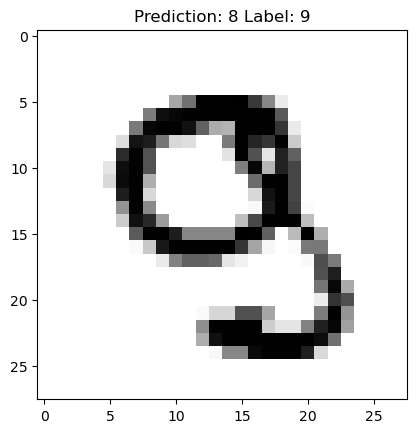

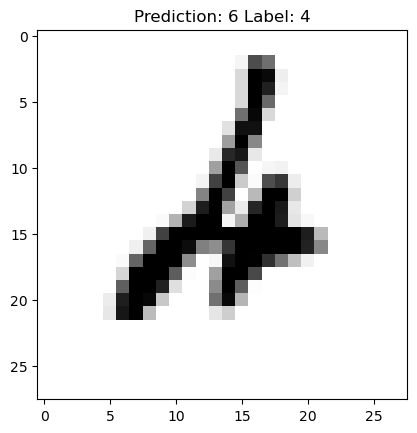

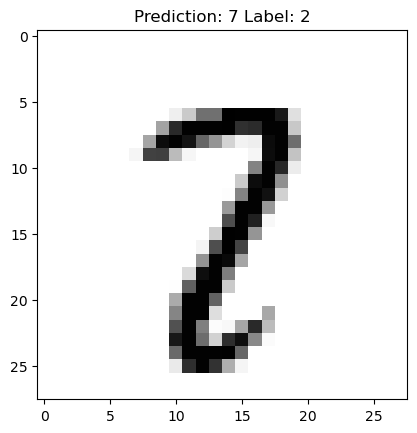

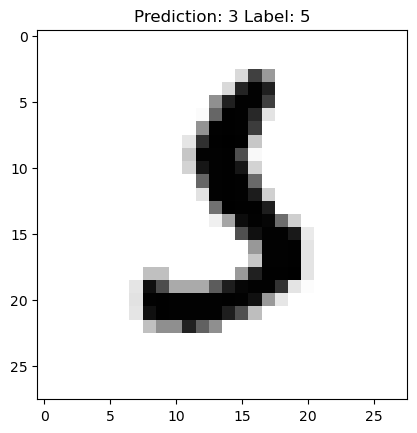

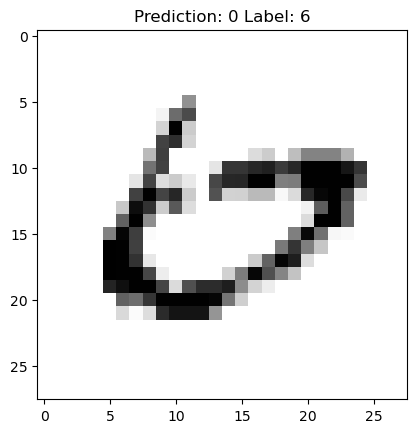

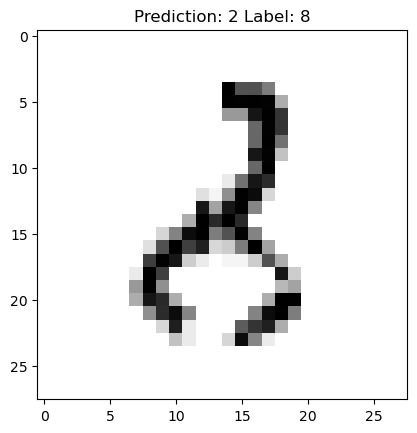

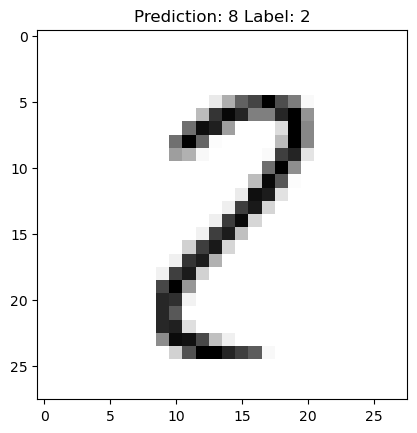

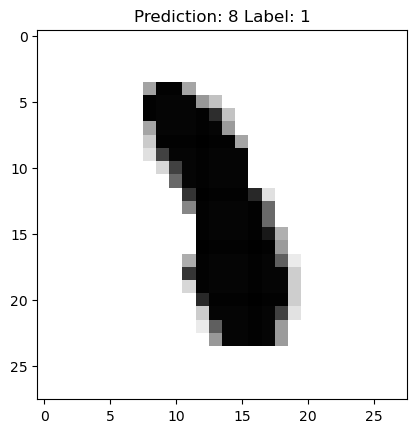

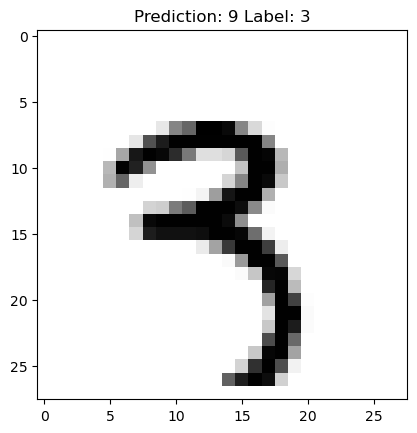

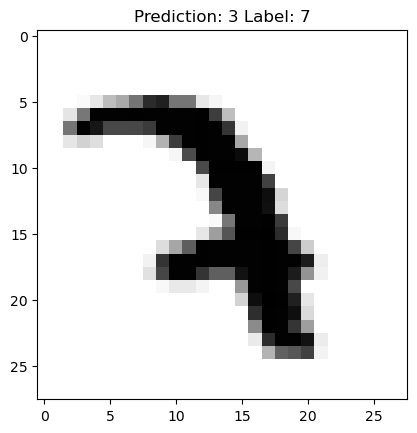

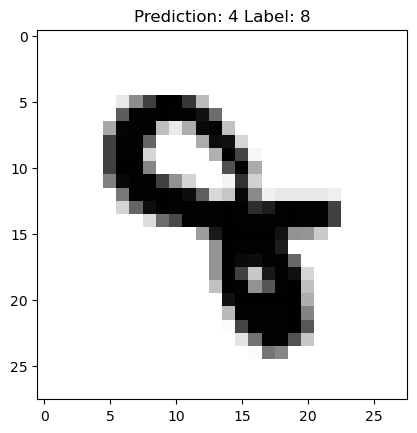

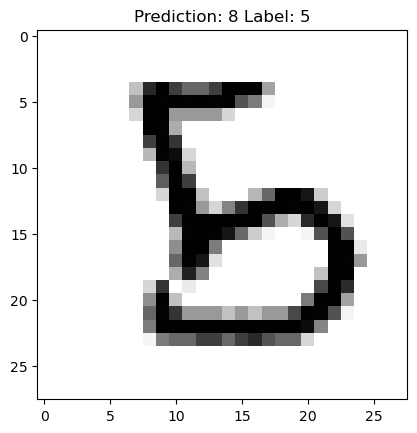

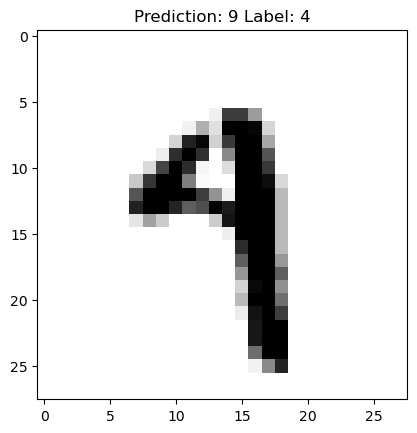

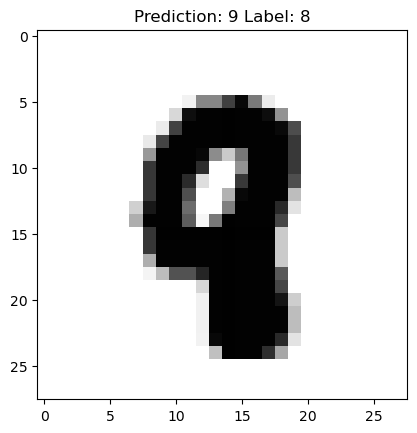

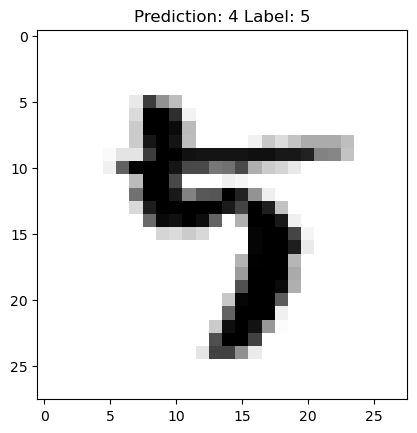

In [18]:
for x in range(1000):
    test_image = test_images[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image, verbose=0).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()